In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
print(tf.test.is_built_with_cuda())
print(tf.test.is_built_with_gpu_support())

True
True


LIST OF PHYSICAL DEVICES

In [ ]:
d= tf.config.list_physical_devices()
for device in d:
  print(device)

PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


In [ ]:
print(tf.config.list_physical_devices('CPU'))
print(tf.test.gpu_device_name())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]



In [ ]:
x= tf.constant(10)
print(x.device)
print(x)
print(x.numpy())
print(x.shape)

/job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor(10, shape=(), dtype=int32)
10
()


In [ ]:
y= tf.zeros((10,5))
print(y.device)
print(y.numpy())
print(y.shape)

/job:localhost/replica:0/task:0/device:CPU:0
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(10, 5)


similarly with variables

In [ ]:
x= tf.Variable(10)
print(x.device)
print(x)
print(x.numpy())
x= tf.Variable(tf.zeros(10))
print(x.device)

/job:localhost/replica:0/task:0/device:CPU:0
<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=10>
10
/job:localhost/replica:0/task:0/device:CPU:0


Debugging Mode On

In [ ]:
from re import T
import tensorflow as tf
tf.debugging.set_log_device_placement(True)
a= tf.constant([[1,2,3],[4,5,6]])
b= tf.constant([[1,2],[2,3],[4,5]])
c= tf.matmul(a,b)
d=tf.Variable(10)
e=d+10

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:CPU:0


In [ ]:
print(c)

tf.Tensor(
[[17 23]
 [38 53]], shape=(2, 2), dtype=int32)


In [ ]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)
a= tf.constant(10)
b= tf.constant(20)
c= tf.constant(30)
z=a+b+c
print(z.numpy())

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:CPU:0
60


Creating Graph

In [ ]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)
def sum_t(a,b,c):
  z=a+b+c
  return z

graph= tf.function(sum_t)
a= tf.constant(10)
b= tf.constant(20)
c= tf.constant(30)
print(graph(a,b,c).numpy())

Executing op __inference_sum_t_41 in device /job:localhost/replica:0/task:0/device:CPU:0
60


In [ ]:
import tensorflow as tf
x=tf.constant([[1,3],[2,1]])
print(x)        #print tensor
print(x.shape)  #print shape of tensor
print(x.dtype)  #print datatype
print(x.numpy())  #tensor to numpy array
print(tf.rank(x).numpy()) #rank
print(tf.add(x,10))   #add 10
print(tf.multiply(x,10))  #multiply
print(x*10)   #multiply
print(x**3) #power

tf.Tensor(
[[1 3]
 [2 1]], shape=(2, 2), dtype=int32)
(2, 2)
<dtype: 'int32'>
[[1 3]
 [2 1]]
2
tf.Tensor(
[[11 13]
 [12 11]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[10 30]
 [20 10]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[10 30]
 [20 10]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 1 27]
 [ 8  1]], shape=(2, 2), dtype=int32)


In [ ]:
#MATRIX MULTIPLICATION
a= tf.constant([[1,2],[3,4]])
b= tf.constant([[3,4],[1,2]])
print(a*b)
print(tf.multiply(a,b))

print(tf.matmul(a,b))
print(a@b)

tf.Tensor(
[[3 8]
 [3 8]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[3 8]
 [3 8]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 5  8]
 [13 20]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 5  8]
 [13 20]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[3 8]
 [3 8]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[3 8]
 [3 8]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 5  8]
 [13 20]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 5  8]
 [13 20]], shape=(2, 2), dtype=int32)


In [ ]:
####SPECIAL MATRIX
x= tf.zeros((2,2))
y= tf.ones((2,2))
z= tf.eye(2)  #identity to keep 1 at diagonal
print(x)
print(y)
print(z)

tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 0.]
 [0. 1.]], shape=(2, 2), dtype=float32)


In [ ]:
import tensorflow as tf
z= tf.ones((2,3,4,5))
#print(z)
print(tf.rank(z).numpy())
print(z.shape)
print(z.dtype)
print(z.ndim) 
print(tf.size(z).numpy())
#####################################expand dims
z1= tf.expand_dims(z,axis=0)  #axis=(0,1,2,3,4)
print(z1.shape)
############################### reduce dims
z2=tf.squeeze(z1, axis=0)
print(z2.shape)

4
(2, 3, 4, 5)
<dtype: 'float32'>
4
120
(1, 2, 3, 4, 5)
(2, 3, 4, 5)


In [ ]:
import numpy as np
x= np.array([[2,3,4,5,6,7],[0,0,1,2,3,4]])
print(x.shape)
#######################3 cannot go beyond real size
y= np.reshape(x,(4,3))
print(y)
###################### can be of any size
z=np.resize(x,(2,30))
print(z)

(2, 6)
[[2 3 4]
 [5 6 7]
 [0 0 1]
 [2 3 4]]
[[2 3 4 5 6 7 0 0 1 2 3 4 2 3 4 5 6 7 0 0 1 2 3 4 2 3 4 5 6 7]
 [0 0 1 2 3 4 2 3 4 5 6 7 0 0 1 2 3 4 2 3 4 5 6 7 0 0 1 2 3 4]]


In [ ]:
x=tf.random.uniform((5,5))
print(x.numpy())
x= tf.random.normal((5,5))
print(x.numpy())
print(x.device)  

[[0.6184573  0.22651398 0.0734874  0.99027157 0.65103877]
 [0.23727441 0.8528707  0.5780201  0.40790212 0.16134977]
 [0.3868482  0.72320473 0.60391724 0.72044945 0.5619439 ]
 [0.8592725  0.9903631  0.07225525 0.8862593  0.6026164 ]
 [0.17694092 0.3808496  0.5598477  0.88318217 0.32246494]]
[[-0.34503356  0.26809603 -0.40065065 -0.6814024   0.69679785]
 [ 0.03141165  0.300342    0.5492395   0.59766227  1.1328678 ]
 [ 0.9317735  -0.19622281 -0.45426327 -0.956556    2.997975  ]
 [ 1.9230105   0.40929726 -0.9452444  -0.36510375  1.46224   ]
 [-0.40384936 -0.8484567   0.20901996  0.6630886  -0.21092497]]
/job:localhost/replica:0/task:0/device:CPU:0


In [ ]:
z= tf.random.uniform((3,3))
print(z.numpy())
print(tf.reduce_max(z).numpy())  #reduce dimension
print(tf.reduce_max(z,axis=0))   #2D matrix so 2 axis ### column wise aixis is 0 by default ### for row axis is 1 by defaultw
print(tf.argmax(z))
print(tf.argmin(z))
print(tf.reduce_sum(z))
print(tf.reduce_max(z).numpy())
print(tf.reduce_min(z).numpy())
print(tf.square(z))

[[0.6224457  0.24344397 0.7577071 ]
 [0.6730114  0.07480037 0.00455272]
 [0.16449547 0.785198   0.41274536]]
0.785198
tf.Tensor([0.6730114 0.785198  0.7577071], shape=(3,), dtype=float32)
tf.Tensor([1 2 0], shape=(3,), dtype=int64)
tf.Tensor([2 1 1], shape=(3,), dtype=int64)
tf.Tensor(3.7384, shape=(), dtype=float32)
0.785198
0.004552722
tf.Tensor(
[[3.8743865e-01 5.9264965e-02 5.7412010e-01]
 [4.5294437e-01 5.5950955e-03 2.0727277e-05]
 [2.7058760e-02 6.1653584e-01 1.7035873e-01]], shape=(3, 3), dtype=float32)


In [ ]:
################ NN ACTIVATION
z= tf.random.uniform((3,3))
print(tf.nn.softmax(z))
print(tf.nn.sigmoid(z))
print(tf.nn.relu(z))

tf.Tensor(
[[0.38854164 0.34846526 0.262993  ]
 [0.2771138  0.29182374 0.43106246]
 [0.33085063 0.29443413 0.3747152 ]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[0.6847203  0.66076124 0.5951453 ]
 [0.5867016  0.59918445 0.68829733]
 [0.53237385 0.5032662  0.56320405]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[0.7755501  0.6666883  0.38527727]
 [0.35034645 0.40206826 0.79217124]
 [0.1296767  0.0130651  0.25417602]], shape=(3, 3), dtype=float32)


In [ ]:
import numpy as np
z= tf.constant(np.arange(10))
print(z.numpy())
print(z[0].numpy())
print(z[-1].numpy())
print(z[0:8].numpy())
print(z[::].numpy())
print(z[::-1].numpy())
print(z[::3].numpy())


[0 1 2 3 4 5 6 7 8 9]
0
9
[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6 7 8 9]
[9 8 7 6 5 4 3 2 1 0]
[0 3 6 9]


In [ ]:
z= tf.constant([[1,2,3],[3,4,5],[5,6,7]])
print(z[:,1].numpy())
print(z[2,:].numpy())
print(z[:,0:2].numpy())

[2 4 6]
[5 6 7]
[[1 2]
 [3 4]
 [5 6]]


In [ ]:
z=[[1,2,3,4],[2,3],[1],[1,2,3]]
print(z)
x=tf.ragged.constant(z)
print(x)

[[1, 2, 3, 4], [2, 3], [1], [1, 2, 3]]
<tf.RaggedTensor [[1, 2, 3, 4], [2, 3], [1], [1, 2, 3]]>


In [ ]:
##METHOD 1
#WASTE OF MEMORY
z=np.zeros((10,10))
z[1,1]=1
z[3,9]=1
print(z)
########################
# METHOD 2
sp={(1,1):1,(3,9):1}
for i in range (10):
  for j in range (10):
    print(sp.get((i,j),0),end=' ')
  
  print()

####################### 
# Method 3
z=tf.sparse.SparseTensor(indices=[[1,1],[3,9]], values=[1,1], dense_shape=[10,10])

print(z)
print(tf.sparse.to_dense(z))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0 0 0 0 0 0 0 0 0 0 
0 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 
SparseTensor(indices=tf.Tensor(
[[1 1]
 [3 9]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 1], shape=(2,), dtype=int32), dense_shape=tf.Tensor([10 10], shape=(2,), dtype=int64))
tf.Tensor(
[[0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]], shape=(10, 10), dtype=int32)


In [ ]:
##########string
import tensorflow as tf
z=tf.constant('Abc Defgh ijkl')
print(z)
z1=tf.strings.split(z,sep=' ')
print(z1)
z2=tf.strings.join(z1,separator=' ')
print(z2)

tf.Tensor(b'Abc Defgh ijkl', shape=(), dtype=string)
tf.Tensor([b'Abc' b'Defgh' b'ijkl'], shape=(3,), dtype=string)
tf.Tensor(b'Abc Defgh ijkl', shape=(), dtype=string)


In [ ]:
import tensorflow as tf
z=tf.constant('Abc Defgh ijkl')
print(z)

tf.Tensor(b'Abc Defgh ijkl', shape=(), dtype=string)


In [ ]:
z1=tf.strings.split(z,sep=' ')
print(z1)

tf.Tensor([b'Abc' b'Defgh' b'ijkl'], shape=(3,), dtype=string)


In [ ]:
z2=tf.strings.join(z1,separator=' ')
print(z2)

tf.Tensor(b'Abc Defgh ijkl', shape=(), dtype=string)


In [ ]:
a=tf.constant(['abc','def ghi','manjeet singht man','pareshi goel'])
print(a)
b=tf.strings.split(a,sep=' ')   #Ragged tensor
print(b)
print(tf.strings.length(b))

tf.Tensor([b'abc' b'def ghi' b'manjeet singht man' b'pareshi goel'], shape=(4,), dtype=string)
<tf.RaggedTensor [[b'abc'], [b'def', b'ghi'], [b'manjeet', b'singht', b'man'],
 [b'pareshi', b'goel']]>
<tf.RaggedTensor [[3], [3, 3], [7, 6, 3], [7, 4]]>


In [ ]:
test=tf.constant('10 20 30 40 50 60 70 80')
a=tf.strings.to_number(tf.strings.split(test,sep=' '))
print(a)
print(tf.reduce_sum(a))

tf.Tensor([10. 20. 30. 40. 50. 60. 70. 80.], shape=(8,), dtype=float32)
tf.Tensor(360.0, shape=(), dtype=float32)


In [ ]:
b=tf.constant('abc def ghijkl')
print(tf.strings.length(b))
c=tf.strings.split()

tf.Tensor(14, shape=(), dtype=int32)


TypeError: ignored

In [ ]:
print(tf.strings.regex_replace("Text with tags.<br /><b>contains html</b>","<[^>]+>"," "))

tf.Tensor(b'Text with tags.  contains html ', shape=(), dtype=string)


In [ ]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)
a=tf.Variable([3+2j,5-6j])
print(a.device)
print(a.shape)
print(a.dtype)
print(a.numpy())
print(a)
print(tf.convert_to_tensor(a))

/job:localhost/replica:0/task:0/device:CPU:0
(2,)
<dtype: 'complex128'>
[3.+2.j 5.-6.j]
<tf.Variable 'Variable:0' shape=(2,) dtype=complex128, numpy=array([3.+2.j, 5.-6.j])>
tf.Tensor([3.+2.j 5.-6.j], shape=(2,), dtype=complex128)


In [ ]:
x=30
y=30
print(x==y)
print(id(x)==id(y))

#### tensorflow
a=tf.Variable(30)
b=tf.Variable(30)
print(a==b)
print(id(a)==id(b))

True
True
tf.Tensor(True, shape=(), dtype=bool)
False


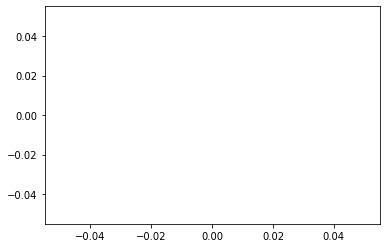

In [ ]:
import tensorflow as tf
import numpy as np
x=tf.constant(np.arange(-10,10,-1))
y_lin=x
#y_sign=tf.nn.sigmoid(x)
y_relu=tf.nn.relu(x)
#y_tanh=tf.nn.tanh(x)
y_thresh=np.where(x<0,0,1)
import matplotlib.pyplot as plt
plt.plot(x,y_lin)

In [ ]:
x=tf.constant([1,2,3,4],dtype=tf.float32)
y=tf.nn.softmax(x)
print(x.numpy())
print(y.numpy())
print(tf.reduce_sum(y).numpy())
print(tf.argmax(y).numpy())

[1. 2. 3. 4.]
[0.0320586  0.08714432 0.23688284 0.6439143 ]
1.0
3


# ***MODEL 1***

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (3, 2)                    8         
                                                                 
 dense_1 (Dense)             (3, 3)                    9         
                                                                 
 dense_2 (Dense)             (3, 4)                    16        
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


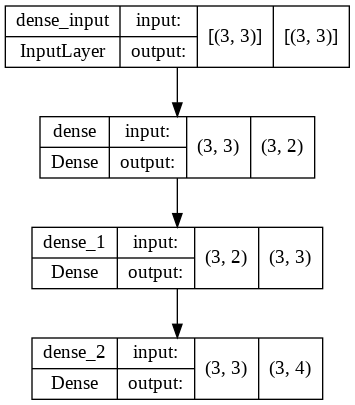

In [ ]:
import tensorflow as tf
from tensorflow import keras
model= keras.Sequential(
[
    keras.layers.Dense(2,activation='relu'), #1st hidden layer
    keras.layers.Dense(3), #2nd hidden layer
    keras.layers.Dense(4) #output layer
])

x=tf.ones((3,3),dtype=tf.float32) #input= 3*3
#p=(3*2+2)+(2*3+3)+(3*4+4)= 8+9+16= 33
y=model(x) #passs input
model.summary()

################Save MODEL IN FIGURE

##### pip install pydot
####### pip install graphviz

keras.utils.plot_model(model,'abc1.png',show_shapes=True)

In [ ]:
print(len(model.weights)) ## total weights 3W and 3B
print(model.weights)
print(model.weights[4].numpy())
print(model.weights[3].numpy())

6
[<tf.Variable 'dense/kernel:0' shape=(3, 2) dtype=float32, numpy=
array([[-0.18310654,  0.8196794 ],
       [ 1.0150263 , -0.62363815],
       [ 1.0517604 , -0.07837903]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>, <tf.Variable 'dense_1/kernel:0' shape=(2, 3) dtype=float32, numpy=
array([[ 0.34793246, -0.8461306 ,  1.0416315 ],
       [ 0.9283943 ,  0.8906771 , -0.6739657 ]], dtype=float32)>, <tf.Variable 'dense_1/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>, <tf.Variable 'dense_2/kernel:0' shape=(3, 4) dtype=float32, numpy=
array([[-0.676124  , -0.6961996 , -0.2850595 ,  0.6222098 ],
       [ 0.53050816,  0.08583307,  0.17225075,  0.90311396],
       [ 0.78598046, -0.6805154 ,  0.91710603,  0.142326  ]],
      dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]
[[-0.676124   -0.6961996  -0.2850595   0.6222098 ]
 [ 0.530

In [ ]:
print(x.shape)
print(y.shape)
print(model.layers)

(3, 3)
(3, 4)
[<keras.layers.core.dense.Dense object at 0x7fd5712ac6d0>, <keras.layers.core.dense.Dense object at 0x7fd56f2f9d50>, <keras.layers.core.dense.Dense object at 0x7fd56f2f9510>]


# MODEL 2

In [ ]:
######################## METHOD 2
import tensorflow as tf
from tensorflow import keras

l1= keras.layers.Dense(2,activation='relu')
l2= keras.layers.Dense(3)
l3= keras.layers.Dense(4)

x=tf.ones((3,3),dtype=tf.float32)

y=l3(l2(l1(x)))
print(y.shape)

(3, 4)


## MODEL 3

In [ ]:
import tensorflow as tf
model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2,activation='relu'))
model.add(tf.keras.layers.Dense(3))
model.add(tf.keras.layers.Dense(4))

x=tf.ones((3,3),dtype=tf.float32)

y= model(x)
model.summary()
model.pop() #########delete top layer
model.summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (3, 2)                    8         
                                                                 
 dense_10 (Dense)            (3, 3)                    9         
                                                                 
 dense_11 (Dense)            (3, 4)                    16        
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fd56ec5c210>>

In [ ]:
import tensorflow as tf
model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2,activation='relu'))
model.add(tf.keras.layers.Dense(3))
model.add(tf.keras.layers.Dense(4))

model.summary()
######### model is created but initial weight is not provided

ValueError: ignored

### SET INPUT LAYER, EXPLICITLY

In [ ]:
import tensorflow as tf
from tensorflow import keras

####### design a model

model= tf.keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(4,)))    ########input layer explicitly
model.add(tf.keras.layers.Dense(2,activation='relu'))
model.add(tf.keras.layers.Dense(3))
model.add(tf.keras.layers.Dense(4))

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 2)                 10        
                                                                 
 dense_19 (Dense)            (None, 3)                 9         
                                                                 
 dense_20 (Dense)            (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [ ]:
########

x=tf.ones((30,4),dtype=tf.float32)
y=model(x)  ###     30,4=OK                30,5= Error
print(y.shape)

(30, 4)


## ###########  PROGRAM1

Basic program to implement keras sequential model for classification of 100 random vectors each having 5 features in 3 classes

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.InputLayer(input_shape = (5,)))
model.add(tf.keras.layers.Dense(2, activation = 'relu'))
model.add(tf.keras.layers.Dense(3))
model.add(tf.keras.layers.Dense(4))

x = tf.ones((100,5), dtype = tf.float32)

y = model(x)
print(y.shape)

(100, 4)


In [ ]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
#input and target
x=tf.random.normal((100,5)).numpy()
t=np.zeros(100)

#####################

# class 0= 30     class 1= 30               class 2= 40

t[30:61]=1
t[61:]=2
print(t)

######################
model=keras.Sequential()
model.add(keras.layers.Dense(5,input_shape=(5,)))
model.add(keras.layers.Dense(3, activation='softmax'))

#########################

model.summary()

##################

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(x, t, epochs = 10, validation_split = 0.1, batch_size = 10)



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2.]
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 5)                 30        
                                                                 
 dense_27 (Dense)            (None, 3)                 18        
                                                                 
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
9/9 [==============================] - 1s 23ms/step - loss: 1.7827 - accuracy: 0.2444 - val_loss: 1.8023 - val_accuracy: 0.4000
Epoch 2/1

### TRAINING STATS

In [ ]:
  #dictionary of loss, accuracy, value_loss, value_accuracy

dict = hist.history
print(dict.keys())

import pandas as pd
df = pd.DataFrame(dict)
df['epoch'] = hist.epoch

print(df)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
       loss  accuracy  val_loss  val_accuracy  epoch
0  1.782663  0.244444  1.802349           0.4      0
1  1.746825  0.244444  1.779819           0.4      1
2  1.718353  0.244444  1.759664           0.4      2
3  1.686244  0.244444  1.737124           0.4      3
4  1.656820  0.255556  1.717548           0.4      4
5  1.630217  0.255556  1.697577           0.3      5
6  1.603246  0.255556  1.675316           0.4      6
7  1.580729  0.255556  1.657845           0.3      7
8  1.555732  0.255556  1.643427           0.3      8
9  1.531760  0.266667  1.625890           0.3      9


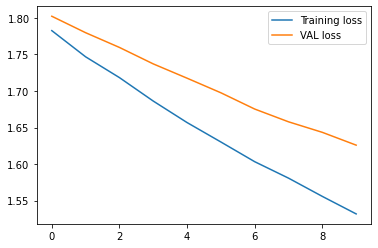

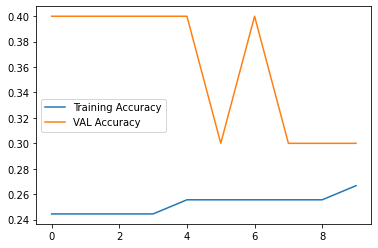

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['loss'],label='Training loss')
plt.plot(df['val_loss'],label='VAL loss')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(df['accuracy'],label='Training Accuracy')
plt.plot(df['val_accuracy'],label='VAL Accuracy')
plt.legend()
plt.show()

### TEST THE MODEL

In [ ]:
test_loss, test_acc=model.evaluate(x,t)
print('TEST LOSS: ', test_loss)
print('TEST ACC: ', test_acc)

4/4 [==============================] - 0s 6ms/step - loss: 1.5316 - accuracy: 0.2700
TEST LOSS:  1.5315817594528198
TEST ACC:  0.27000001072883606


### PREDICT THE MODEL

In [ ]:
x_new = tf.random.uniform((1,5))

p = model.predict(x_new)
print(p)

print('Predicted Class', np.argmax(p))

[[0.35173476 0.21373308 0.43453214]]
Predicted Class 2


In [ ]:
x_new = tf.random.uniform((5,))
x_new.numpy()
x_new1= tf.expand_dims(x_new, axis=0)
p= model.predict(x_new1)
print(p)
print('PREDICTED CLASS: ', np.argmax(p))  ############ 0,1,2

[[0.23593487 0.08807175 0.67599344]]
PREDICTED CLASS:  2


### SAVE THE MODEL

## LOAD THE MODEL

In [ ]:
model1= keras.models.load_model('Model2')
print(model1.weights)
model1.summary()

[<tf.Variable 'dense_26/kernel:0' shape=(5, 5) dtype=float32, numpy=
array([[-0.33366424,  0.58196276,  0.68596894,  0.17340243, -0.69214046],
       [-0.1878059 ,  0.3953304 , -0.18229769,  0.6918222 ,  0.30050611],
       [ 0.69732153,  0.6537731 ,  0.1625213 ,  0.20856872,  0.3512768 ],
       [ 0.4455997 , -0.09946621, -0.37522087, -0.22850892,  0.05525111],
       [ 0.38968867,  0.19634664,  0.557935  , -0.38576144, -0.5778435 ]],
      dtype=float32)>, <tf.Variable 'dense_26/bias:0' shape=(5,) dtype=float32, numpy=
array([ 0.01151681, -0.02384978, -0.0183739 , -0.01044942, -0.0205411 ],
      dtype=float32)>, <tf.Variable 'dense_27/kernel:0' shape=(5, 3) dtype=float32, numpy=
array([[ 0.66962945, -0.34683022, -0.03312986],
       [-0.7783994 , -0.6891272 ,  0.674877  ],
       [-0.78321266, -0.3052193 , -0.3276043 ],
       [ 0.36422896, -0.65902734,  0.4805837 ],
       [-0.19103858,  0.5721517 ,  0.6905543 ]], dtype=float32)>, <tf.Variable 'dense_27/bias:0' shape=(3,) dtype=flo

OVERFITTING

1. Dropout Layer # it will close random connections
2. Regularization # Penalty/Additional Cost L1,L2
3. Early Stopping